## Data Analysis

In [1]:
#Import pandas library
import pandas as pd

In [2]:
#Read scrapped data file
#Open airbnb_hawai_data.csv file from folder
Airbnbdata = pd.read_csv(r'C:/Users/ns/OneDrive/Desktop/AirBnb - Web Scraping & Data Analysis/Airbnb_FE_Data.csv').drop('Unnamed: 0',axis='columns')
#Airbnbdata

In [3]:
#Imports libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Check the datatype for airbnbdata
#Airbnbdata.info()

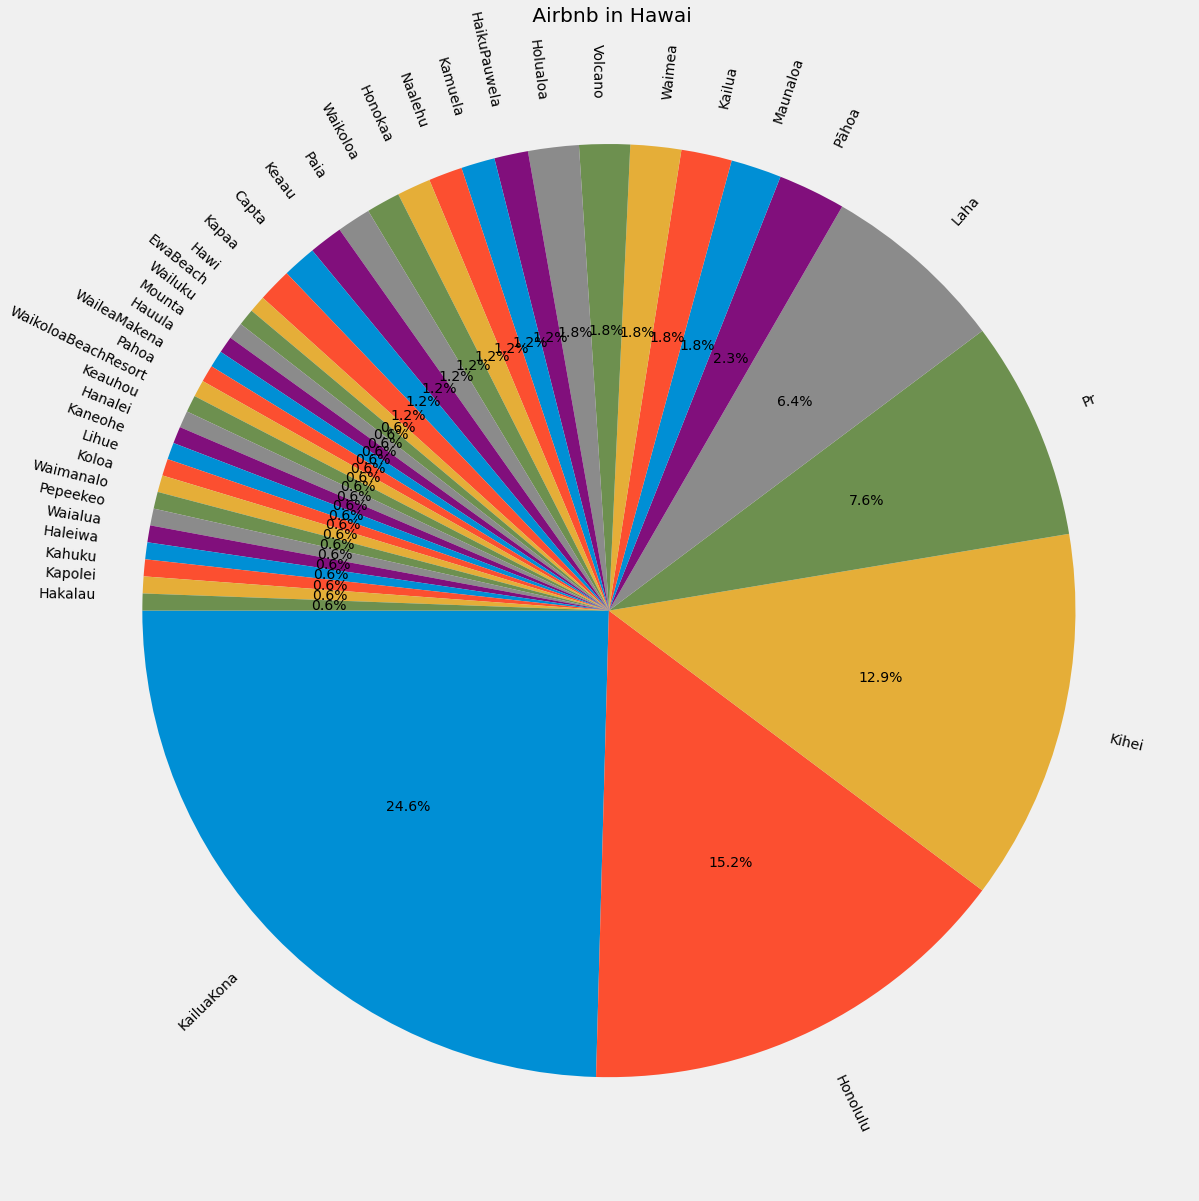

In [5]:
#1. How many Airbnb are available in different cities?
# In Which City has the highest % of accommodation available in Hawai

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
plt.title(" Airbnb in Hawai")
plt.pie(Airbnbdata.Location_of_Accomodation.value_counts(), labels=Airbnbdata.Location_of_Accomodation.value_counts().index,autopct='%1.1f%%', startangle=180, rotatelabels =True)
plt.xticks(rotation = 60)
plt.show()

### Finding 1. : Highest % of accomodation available in Kailua-Kona airbnb

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


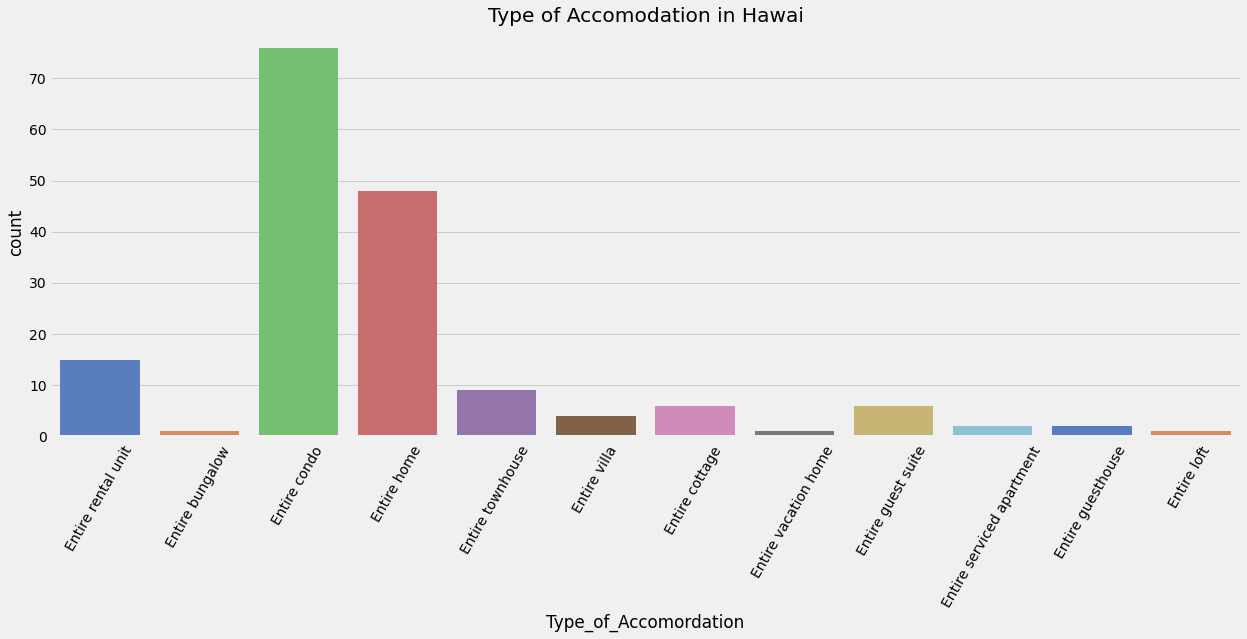

In [6]:
#2. What is the highest type of accommodation available in Hawaii?

plt.figure(figsize=(19,7))
plt.title("Type of Accomodation in Hawai")
sns.countplot(Airbnbdata.Type_of_Accomordation, palette="muted")
plt.xticks(rotation = 60)
fig = plt.gcf()
plt.show()

### Finding 2. : "Entire Condo" is highest type of accomodation available in hawai

Text(0, 0.5, 'Number of place')

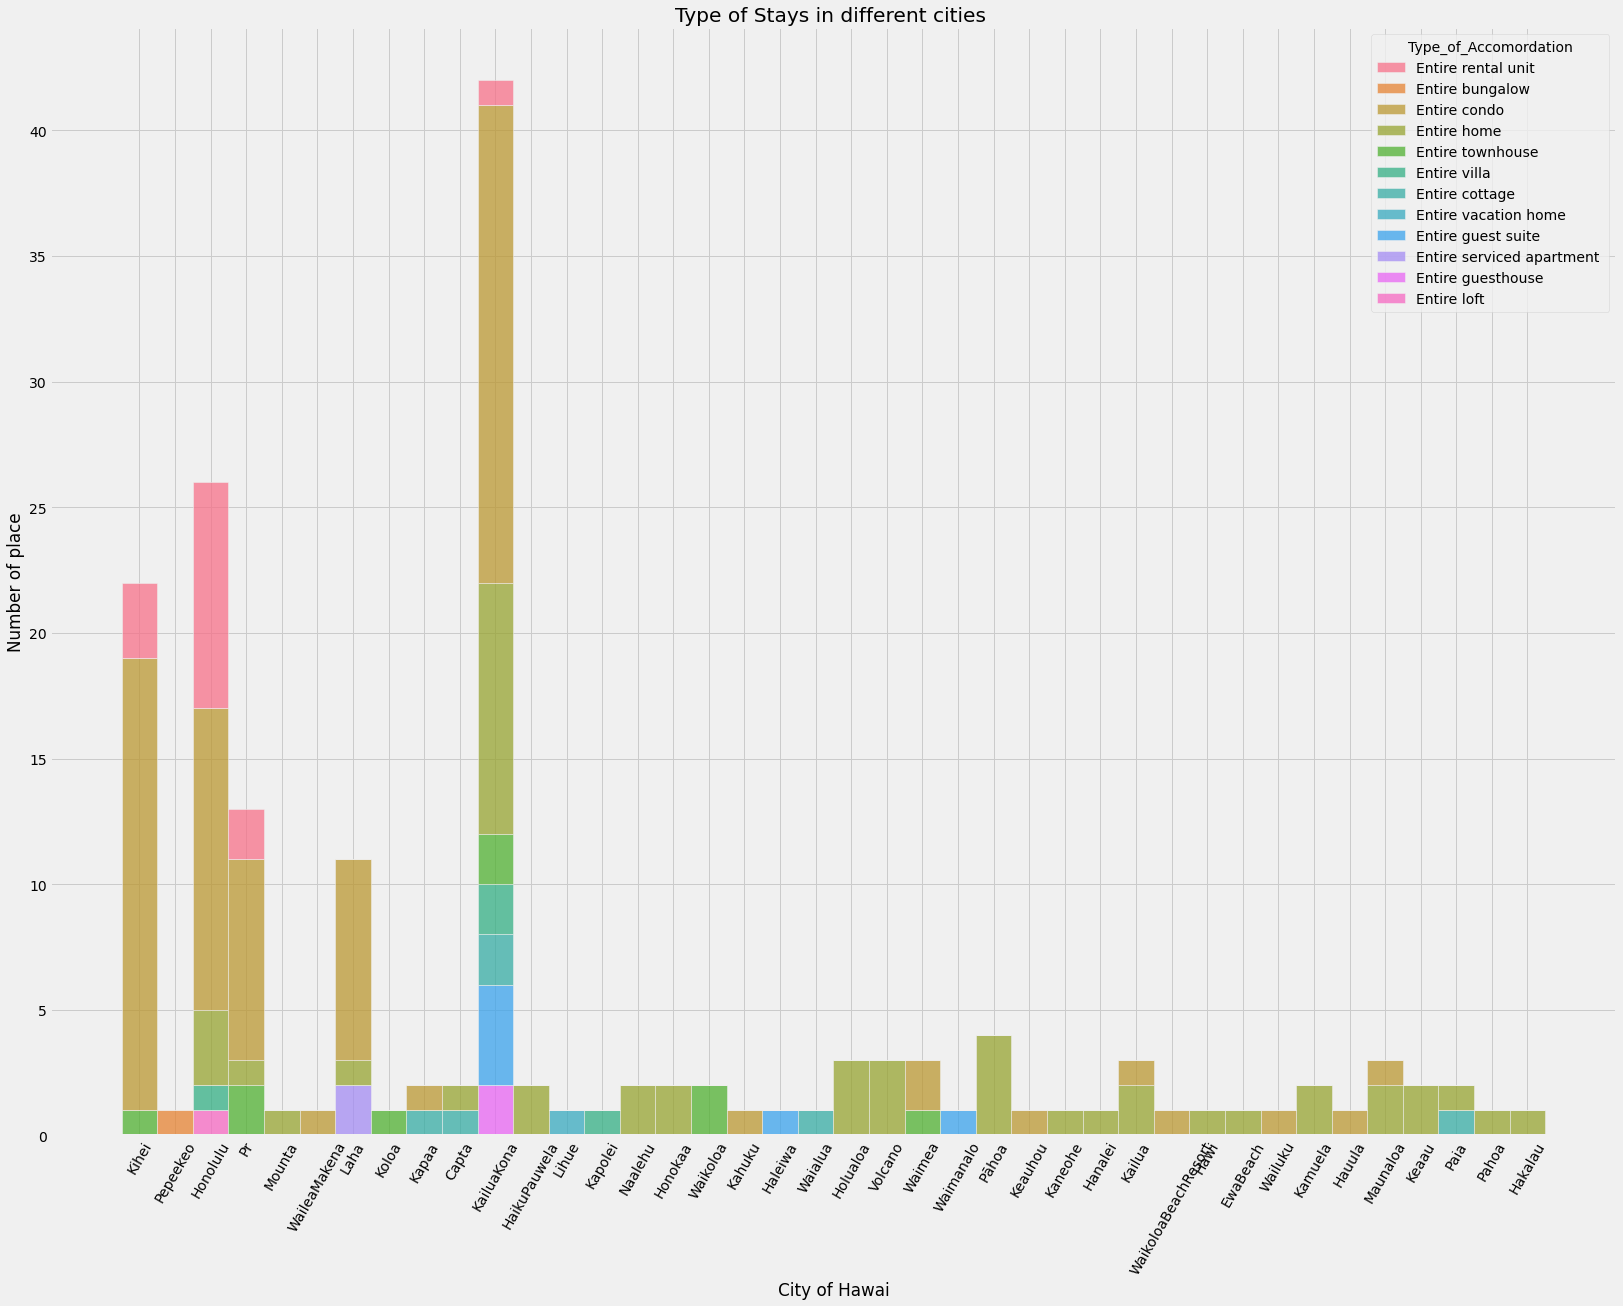

In [31]:
#3. What type of stay available in different cities

plt.figure(figsize=(25,19))
plt.title("Type of Stays in different cities ")
sns.histplot(Airbnbdata, x=Airbnbdata.Location_of_Accomodation, hue=Airbnbdata.Type_of_Accomordation, multiple="stack",color="lightblue")
plt.xticks(rotation = 60)
plt.xlabel("City of Hawai")
plt.ylabel("Number of place")

### Finding 3. : Different Citys have a different kinds of accommodation available.
   ###### No Common type of stay available in all the cities but most of the Cities has "Entire Home" available

In [32]:
#After deciding city let's check what are the nominal price based on bedrooms and no of guest

# In order to do above analysis we have to create dataframe as below
Airbnbdata1 = Airbnbdata[['No_of_guest','Total/Night','Rooms']]
#Airbnbdata1

In [38]:
# Remove some of the text from column like(CAD, $, ",")
Airbnbdata1['Total/Night'] = Airbnbdata1['Total/Night'].str.replace('[CAD per night,$,,]','',regex=True)
Airbnbdata1['No_of_guest'] = Airbnbdata1['No_of_guest'].str.replace('guests','')
Airbnbdata1['Rooms'] = Airbnbdata1['Rooms'].str.replace('[bedrooms,bedroom]','',regex=True)
Airbnbdata1['Rooms'] = Airbnbdata1['Rooms'].str.replace('Stui','0')
#Airbnbdata1

In [24]:
# Price_night are in object format
#Airbnbdata1.info()

In [25]:
#convert price_night from object to int datatype
Airbnbdata1["Total/Night"] = Airbnbdata1["Total/Night"].astype(str).astype(int)
Airbnbdata1["No_of_guest"] = Airbnbdata1["No_of_guest"].astype(str).astype(int)
Airbnbdata1["Rooms"] = Airbnbdata1["Rooms"].astype(str).astype(int)
#print(Airbnbdata1.dtypes)

In [26]:
#sort the value based on guest size
Airbnbdata1 = Airbnbdata1.sort_values(by=['No_of_guest'], ascending=True)

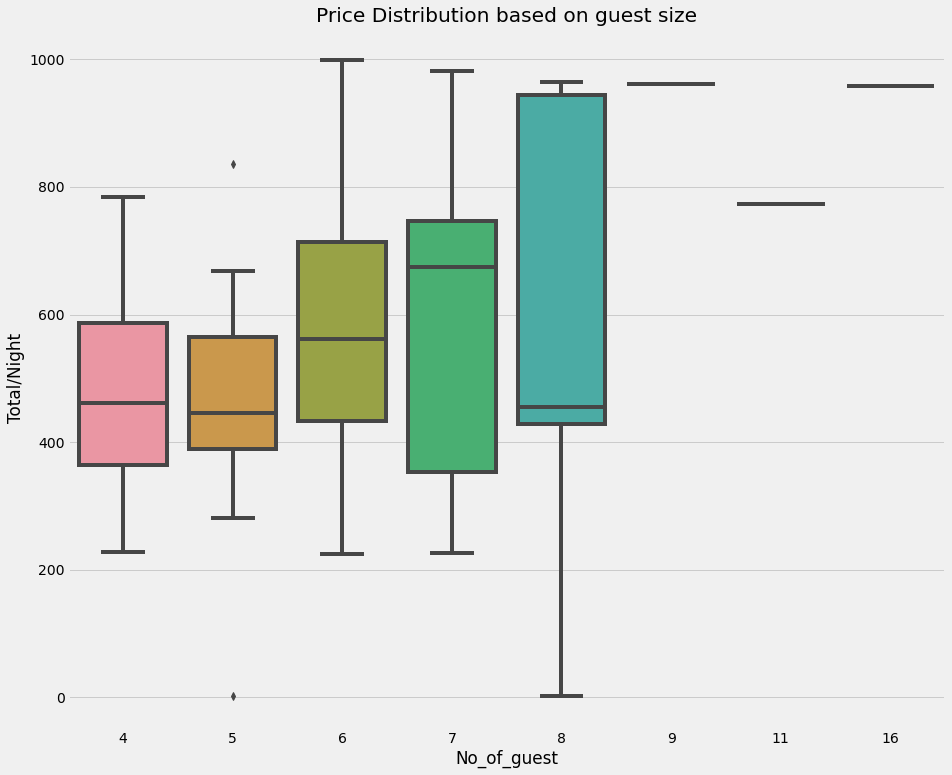

In [27]:
#4. Is there any relation between price per night and the number of guests?

plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='Total/Night',x='No_of_guest',data = Airbnbdata1)
plt.title('Price Distribution based on guest size')
plt.show()

### Finding 4. : Based on above analysis we can say that price are not dependent on the guestsize.

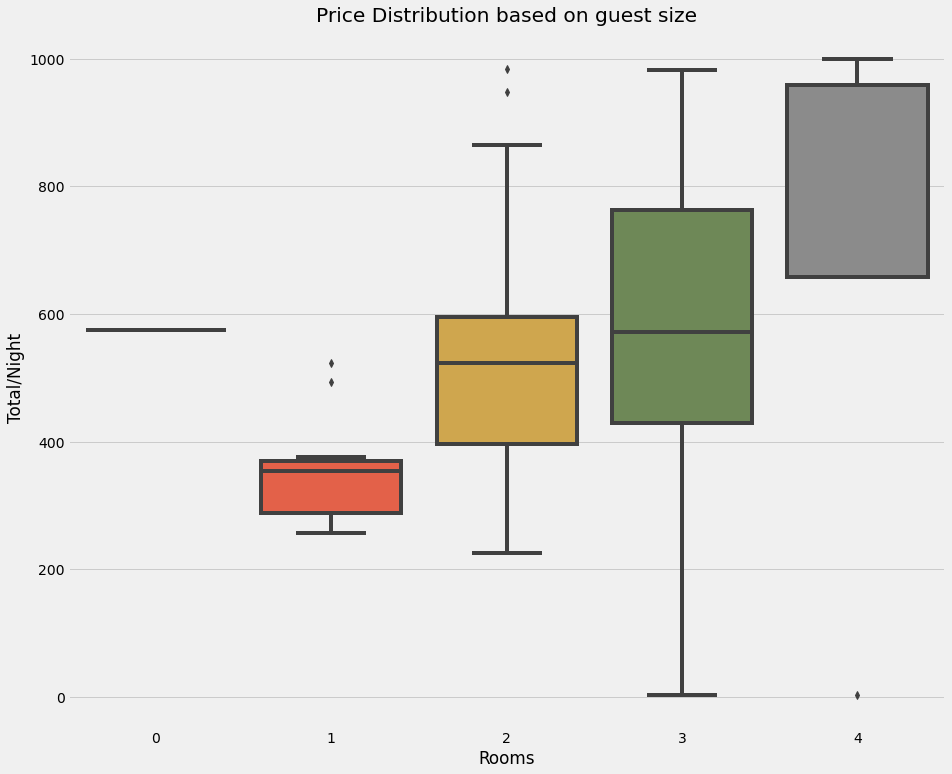

In [28]:
#5. What are the prices based on bedrooms and is there any relation between price and number of rooms

plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='Total/Night',x='Rooms',data = Airbnbdata1)
plt.title('Price Distribution based on guest size')
plt.show()